Build a regression model.

In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv('data_raw.csv')


In [18]:
# Count the number of nearby bars for each bike station
num_bars_per_station = df.groupby('bike_station_name')['restaurant_name'].count()
num_of_bars = num_bars_per_station.values.tolist()

# Create X and y variables for the regression
X = pd.DataFrame({'num_of_bars': num_of_bars}, index=num_bars_per_station.index)
y = df.groupby('bike_station_name')['num_of_bikes'].sum()

# Fit the linear regression model
X = sm.add_constant(X)  # Add a constant term (intercept) to the model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           num_of_bikes   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     7.058
Date:                Mon, 31 Jul 2023   Prob (F-statistic):             0.0131
Time:                        09:54:52   Log-Likelihood:                -129.84
No. Observations:                  29   AIC:                             263.7
Df Residuals:                      27   BIC:                             266.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.1300      6.062      1.341      

There is a statistically significant positive relationship between th enumber of nearby bars and the number of bikes (p_value = 0.013). As the number of bars increases, the number of bikes tends to increase as well (coef = 2.8927). However, it is only about 20.7% of variance in number of bikes can be explained by the number of nearby bars (R-squared = 0.207), this means there are likely other factors affecting the number of bikes which are not included in the model.

Provide model output and an interpretation of the results. 

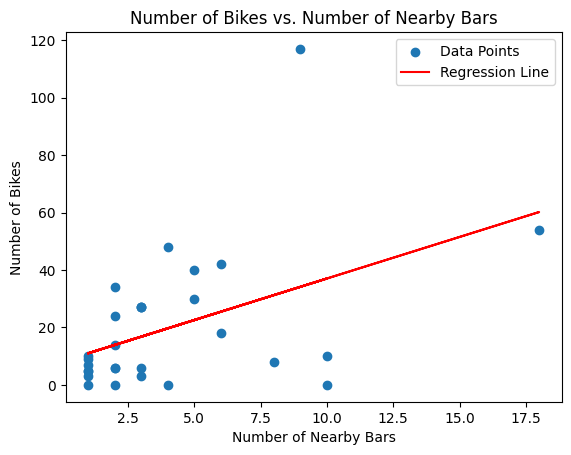

In [20]:
# Plot the data points
plt.scatter(X['num_of_bars'], y, label='Data Points')

# Plot the regression line
plt.plot(X['num_of_bars'], model.predict(X), color='red', label='Regression Line')

# Set plot title and axis labels
plt.title('Number of Bikes vs. Number of Nearby Bars')
plt.xlabel('Number of Nearby Bars')
plt.ylabel('Number of Bikes')

# Show the legend
plt.legend()

# Show the plot
plt.show()

# Stretch

How can you turn the regression model into a classification model?